In [9]:
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Permutation testing
Let's start with a simple case where we do know the generating distribution (normal with unknown means), and compare with a t-test

In [10]:
n = 50
m = 100
scale = 0.1
x_mean = np.random.randn()*scale
y_mean = np.random.randn()*scale

X = np.random.randn(n) + x_mean
Y = np.random.randn(m) + y_mean

In [11]:
Z = np.hstack([X,Y])
W = np.hstack([np.ones(n), np.ones(m)*2])
T = abs(Z[np.where(W == 1)[0]].mean() - Z[np.where(W == 2)[0]].mean())

In [ ]:
B = 500 
Tb = np.zeros(B) # initialize the array to store the mean differences for the bootstrap samples

for i in range(B-1):  # shuffling 499 times since starts from 0-498
    idx = np.random.choice(n+m, n+m, replace=False) 
    Wi = W[idx]
    Tb[i] = abs(Z[np.where(Wi == 1)[0]].mean() - Z[np.where(Wi == 2)[0]].mean()) # calculate the mean difference for the shuffled data

Tb[-1] = T 

In [ ]:
Tb

array([ 2.46821172, 26.82624286, 22.48783093, 18.3849701 ,  4.47506781,
       22.12332047, 25.92682613,  7.24601722, 25.9473507 ,  3.21475536,
       24.30977294, 21.90078488, 18.2894605 , 19.24792929, 19.89307931,
       24.33921635, 22.6344518 ,  2.15881711,  2.64533956, 17.51110852,
       21.86450566,  5.37073342, 22.63086926, 17.38205894,  2.67719244,
       21.64757497, 28.48880233,  4.09344245, 31.24946701, 22.10180389,
       21.66920497, 23.52611742,  2.18232834, 25.05313691,  3.52580026,
       19.15767205, 25.56497978, 23.42603914, 24.31592444, 18.56609646,
       18.46413467, 24.6284265 ,  5.30420294, 22.27564995, 23.53504482,
       23.34817261, 20.82302068, 18.512596  , 22.09279005, 25.66199604,
       31.10938147, 25.88232808, 25.50391656, 22.77835   ,  2.06353258,
       14.347701  ,  2.7367835 , 25.5811461 , 20.47081058, 27.73202025,
        2.31104096, 21.28317562,  4.79820016,  3.29563685, 23.99413906,
       23.47604498, 23.62854459,  2.15839101,  5.54954662,  2.89

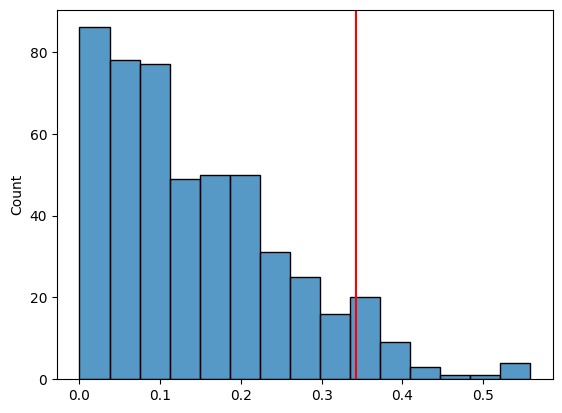

In [13]:
sns.histplot(x=Tb)
plt.axvline(x=T,color='red')

In [14]:
p = (Tb >= T).mean()
p_tt = ttest_ind(X,Y)
print(p)
p_tt

0.062


TtestResult(statistic=np.float64(-1.8797097257730353), pvalue=np.float64(0.062113308177770166), df=np.float64(148.0))

## Permutation testing in the yeast genomics data
Let's go back and look at the expression data from our data wrangling lecture

In [15]:
raw_data = pd.read_csv('Dataset_S1.csv',header=None,index_col=0).T
raw_data.iloc[:,5:] = raw_data.iloc[:,5:].apply(pd.to_numeric)
median_expression = raw_data.drop(columns=['Dye','Replicate']).groupby(['Name','Strain','Cond']).median().apply(pd.to_numeric)
median_expression

,,,YJR107W,YDR518W,YDR233C,YHR098C,YFR029W,YPL198W,YDR001C,YLR394W,YCR079W,YAL061W,...,YOL121C,YDL213C,YLR093C,YHR116W,YPR115W,YML070W,YCR065W,YJL065C,YLR118C,YBR242W
Name,Strain,Cond,,,,,,,,,,,,,,,,,,,,,
BY11E,BY,ethanol,0.29,-1.18,-0.03,-0.11,0.58,-0.81,0.04,0.18,0.12,0.40,...,-0.47,0.06,-0.11,0.26,-0.07,0.39,-0.44,-0.11,0.22,-0.08
BY11g,BY,glucose,-0.25,0.58,0.06,0.37,-0.29,0.23,-0.61,-0.46,-0.80,-2.88,...,0.17,0.66,-0.24,-0.65,-0.20,-0.11,-0.17,0.14,0.27,0.06
BY1E,BY,ethanol,0.28,-1.48,0.04,-0.14,0.71,-1.18,0.09,0.32,-0.22,0.45,...,-0.38,0.18,-0.09,0.31,0.01,0.18,-0.62,0.00,0.11,-0.08
BY1g,BY,glucose,-0.18,0.57,0.17,0.50,-0.23,0.20,-0.67,-0.56,-0.90,-3.00,...,0.14,0.61,-0.29,-0.64,-0.15,-0.21,-0.14,0.08,0.24,0.25
BY3E,BY,ethanol,0.20,-1.39,0.06,-0.30,0.50,-0.74,-0.23,0.27,-0.46,0.09,...,-0.01,0.28,-0.12,0.29,-0.25,-0.05,-0.66,-0.09,0.15,0.11
BY3g,BY,glucose,-0.13,0.63,0.29,0.50,-0.18,0.12,-0.64,-0.57,-0.82,-3.00,...,0.12,0.49,-0.29,-0.63,-0.24,-0.18,-0.07,0.19,0.33,0.19
BY5E,BY,ethanol,0.40,-1.35,0.13,-0.03,0.51,-0.79,-0.24,0.30,0.03,0.33,...,-0.44,0.00,-0.18,0.28,-0.13,0.19,-0.24,-0.13,0.25,-0.04
BY5g,BY,glucose,-0.19,0.56,0.16,0.36,-0.22,-0.11,-0.46,-0.55,-0.78,-2.33,...,0.20,0.60,-0.25,-0.57,-0.42,-0.01,-0.18,0.10,0.38,0.19
BY7E,BY,ethanol,0.13,-1.39,-0.08,-0.16,0.36,-0.92,-0.13,0.39,0.04,0.28,...,-0.31,0.05,0.01,0.38,-0.10,0.15,-0.47,-0.14,0.08,-0.21


Recall the result that PC1 seemed to mostly correspond to condition and PC2 seemed to mostly correspond to strain:

<Axes: xlabel='PC1', ylabel='PC2'>

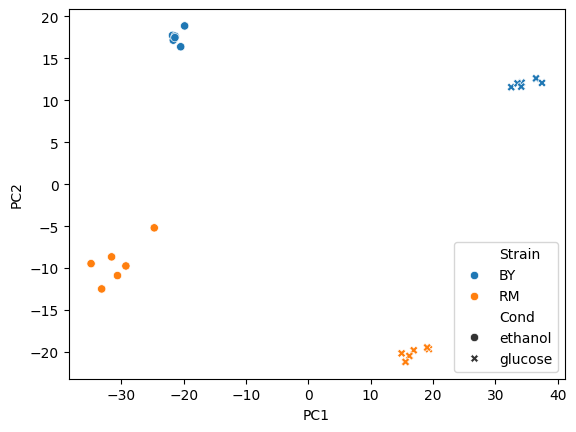

In [16]:
def our_pca(X,center=True):
    if center:
        X = X.apply(lambda x: x-x.mean())
    U,sigma,Vt = np.linalg.svd(X.T,full_matrices=False)
    PCs = np.diag(sigma).dot(Vt)
    PVE = sigma**2/(sigma**2).sum()
    return PCs, U, PVE

PCs,U,PVE = our_pca(median_expression)
df_PCs = pd.DataFrame(PCs.T)
df_PCs.columns = ['PC%d'%(i+1) for i in range(PCs.shape[0])]

df_PCs['Strain'] = median_expression.index.get_level_values(1)
df_PCs['Cond'] = median_expression.index.get_level_values(2)

sns.scatterplot(df_PCs,x='PC1',y='PC2', hue='Strain', style='Cond')

It looks like there may be a difference in the ways strains differentially associate with PCs depending on condition.

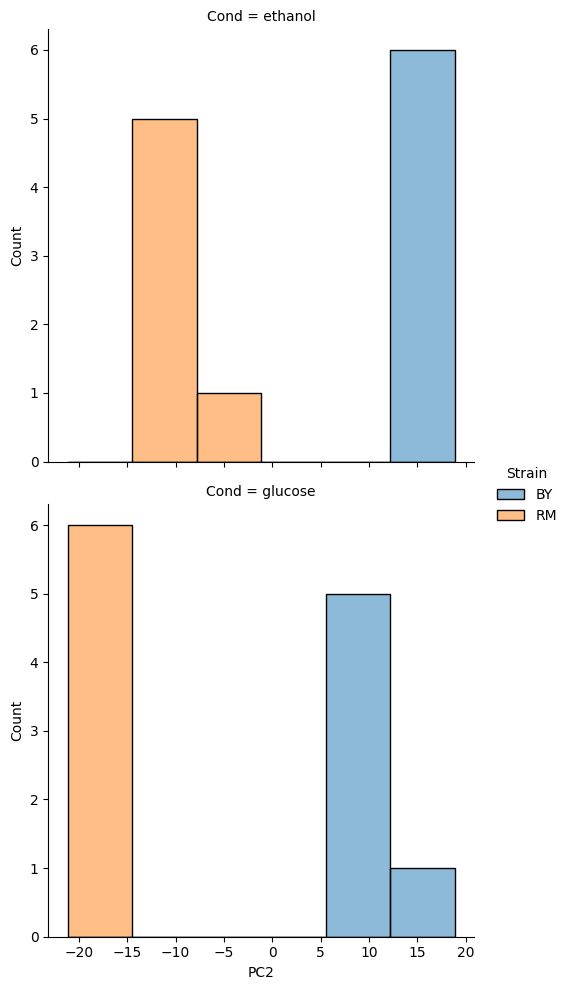

In [17]:
sns.displot(df_PCs, x='PC2', row='Cond', hue='Strain')

The difference between the mean BY and mean RM PC2 values is bigger in glucose than it is in ethanol.<br>Let's say we're interested in knowing whether there is _any_ PC that is associated with strain in a way that differs across conditions. (Don't think too hard about whether this is biologically meaningful...) So, at a high level, we want to do the same analysis as above for all the PCs, then report the maximum difference between conditions over all PCs.

Let's say we calculate this value and are interested in knowing if the result is significant. Two problems with this: (1) I have absolutely no idea what the distribution of the maximum over PC difference differences should be, so can't just use a t-test (or other parametric); (2) Permutation testing could therefore be useful, but we can't use it directly here because the samples' representation in PC space is not independent.

To address this we'll split the data by condition, compute PCs in each, then calculate our test statistic and do permutation testing.

In [18]:
ethanol = median_expression[median_expression.index.get_level_values('Cond') == 'ethanol']
glucose = median_expression[median_expression.index.get_level_values('Cond') == 'glucose']

PCs,U,PVE = our_pca(ethanol)
PCs_ethanol = pd.DataFrame(PCs.T)
PCs_ethanol.columns = ['PC%d'%(i+1) for i in range(PCs_ethanol.shape[0])]
PCs_ethanol['Strain'] = ethanol.index.get_level_values(1)

PCs,U,PVE = our_pca(glucose)
PCs_glucose = pd.DataFrame(PCs.T)
PCs_glucose.columns = ['PC%d'%(i+1) for i in range(PCs_glucose.shape[0])]
PCs_glucose['Strain'] = glucose.index.get_level_values(1)

Let's have a look at the PCs in each condition to get a feeling for which PCs might be associated with strain.

<Axes: xlabel='PC1', ylabel='PC2'>

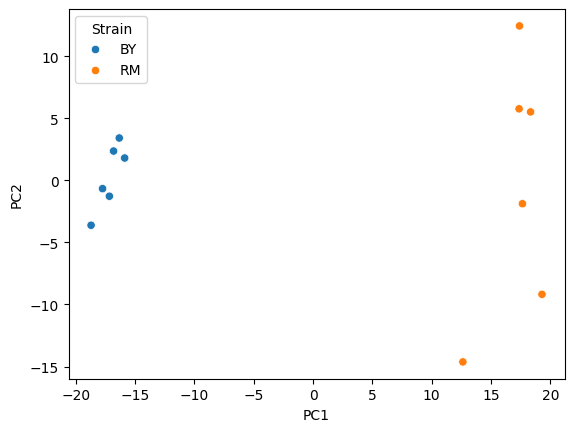

In [19]:
sns.scatterplot(PCs_ethanol,x='PC1',y='PC2', hue='Strain')

<Axes: xlabel='PC1', ylabel='PC2'>

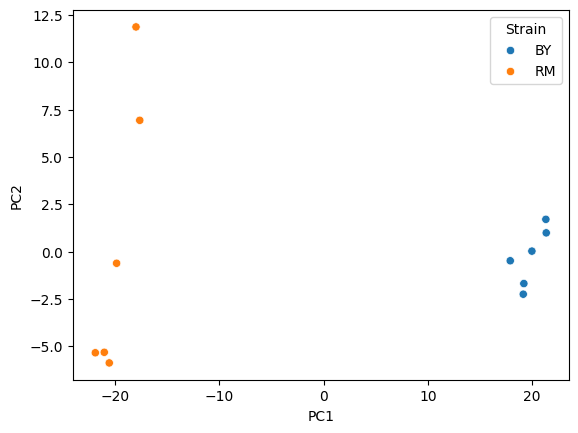

In [20]:
sns.scatterplot(PCs_glucose,x='PC1',y='PC2', hue='Strain')

So it sure looks like PC1 has an association with strain in both conditions, which makes sense given that strain appeared associated with PC2 in the combined data, and we've effectively removed PC1 of the combined data (since it seemed to mostly associate with condition).

We want to ask if there is any PC that's associated with strain in a way that differs across condition. Let's call $z$ the mean value for a given strain in a given condition for a certain PC. Our test statistic is: $T=\max_{i} |[| z(BY,PC_i,ethanol) - z(RM,PC_i,ethanol) | - | z(BY,PC_i,glucose) - z(RM,PC_i,glucose) |]|$

In [21]:
Z_ethanol = PCs_ethanol.groupby("Strain").mean()
Z_glucose = PCs_glucose.groupby("Strain").mean()
T = abs(abs(Z_ethanol.loc['BY'] - Z_ethanol.loc['RM']) - abs(Z_glucose.loc['BY'] - Z_glucose.loc['RM']))
T

PC1     5.425505e+00
PC2     1.064375e-01
PC3     4.213680e-01
PC4     2.873438e-01
PC5     1.815224e-01
PC6     3.250757e-03
PC7     1.388921e-01
PC8     1.092045e-02
PC9     2.336925e-03
PC10    1.103170e-03
PC11    3.916750e-03
PC12    1.972152e-30
dtype: float64

In [22]:
T = T.max()

For permutation tests, we'll shuffle condition labels, recompute PCs, then recompute our (bonkers) test statistic. Let's try a couple ways to shuffle the labels to see some pitfalls.<br>First we'll consider shuffling the rows in the expression table, while leaving the index labels (Name, Strain, Cond) in place. Here's how we'd do that:

In [23]:
n = median_expression.shape[0]
idx = np.random.choice(n,n,replace=False)
data_copy = median_expression.copy()
data_copy[:] = median_expression.values[idx]
ei = data_copy[data_copy.index.get_level_values('Cond') == 'ethanol']
gi = data_copy[data_copy.index.get_level_values('Cond') == 'glucose']

So the problem with this is that we've also shuffled the strain labels, which we were not trying to do. Instead we should do the following:

In [24]:
idx = np.random.choice(n,n,replace=False)
data_copy = median_expression.copy()
labels_cond = data_copy.index.get_level_values('Cond')[idx]
labels_strain = data_copy.index.get_level_values('Strain')
labels_name = data_copy.index.get_level_values('Name')
data_copy.index = pd.MultiIndex.from_arrays([labels_name,labels_strain, labels_cond], names=('Name','Strain', 'Cond'))
data_copy

,,,YJR107W,YDR518W,YDR233C,YHR098C,YFR029W,YPL198W,YDR001C,YLR394W,YCR079W,YAL061W,...,YOL121C,YDL213C,YLR093C,YHR116W,YPR115W,YML070W,YCR065W,YJL065C,YLR118C,YBR242W
Name,Strain,Cond,,,,,,,,,,,,,,,,,,,,,
BY11E,BY,glucose,0.29,-1.18,-0.03,-0.11,0.58,-0.81,0.04,0.18,0.12,0.40,...,-0.47,0.06,-0.11,0.26,-0.07,0.39,-0.44,-0.11,0.22,-0.08
BY11g,BY,glucose,-0.25,0.58,0.06,0.37,-0.29,0.23,-0.61,-0.46,-0.80,-2.88,...,0.17,0.66,-0.24,-0.65,-0.20,-0.11,-0.17,0.14,0.27,0.06
BY1E,BY,ethanol,0.28,-1.48,0.04,-0.14,0.71,-1.18,0.09,0.32,-0.22,0.45,...,-0.38,0.18,-0.09,0.31,0.01,0.18,-0.62,0.00,0.11,-0.08
BY1g,BY,glucose,-0.18,0.57,0.17,0.50,-0.23,0.20,-0.67,-0.56,-0.90,-3.00,...,0.14,0.61,-0.29,-0.64,-0.15,-0.21,-0.14,0.08,0.24,0.25
BY3E,BY,ethanol,0.20,-1.39,0.06,-0.30,0.50,-0.74,-0.23,0.27,-0.46,0.09,...,-0.01,0.28,-0.12,0.29,-0.25,-0.05,-0.66,-0.09,0.15,0.11
BY3g,BY,glucose,-0.13,0.63,0.29,0.50,-0.18,0.12,-0.64,-0.57,-0.82,-3.00,...,0.12,0.49,-0.29,-0.63,-0.24,-0.18,-0.07,0.19,0.33,0.19
BY5E,BY,glucose,0.40,-1.35,0.13,-0.03,0.51,-0.79,-0.24,0.30,0.03,0.33,...,-0.44,0.00,-0.18,0.28,-0.13,0.19,-0.24,-0.13,0.25,-0.04
BY5g,BY,glucose,-0.19,0.56,0.16,0.36,-0.22,-0.11,-0.46,-0.55,-0.78,-2.33,...,0.20,0.60,-0.25,-0.57,-0.42,-0.01,-0.18,0.10,0.38,0.19
BY7E,BY,glucose,0.13,-1.39,-0.08,-0.16,0.36,-0.92,-0.13,0.39,0.04,0.28,...,-0.31,0.05,0.01,0.38,-0.10,0.15,-0.47,-0.14,0.08,-0.21


Okay so now we do many permutations in this way, and then calculate the PCs and test statistic

In [25]:
B = 100
Tb = np.zeros(B)
n = median_expression.shape[0]

labels_strain = median_expression.index.get_level_values('Strain')
labels_name = median_expression.index.get_level_values('Name')

for i in range(B-1):
    idx = np.random.choice(n,n,replace=False)
    data_copy = median_expression.copy()
    labels_cond = data_copy.index.get_level_values('Cond')[idx]
    data_copy.index = pd.MultiIndex.from_arrays([labels_name,labels_strain, labels_cond], names=('Name','Strain', 'Cond'))
    
    ei = data_copy[data_copy.index.get_level_values('Cond') == 'ethanol']
    gi = data_copy[data_copy.index.get_level_values('Cond') == 'glucose']
    
    PCs,U,PVE = our_pca(ei)
    pe = pd.DataFrame(PCs.T)
    pe.columns = ['PC%d'%(i+1) for i in range(pe.shape[0])]
    pe['Strain'] = ei.index.get_level_values(1)
    
    PCs,U,PVE = our_pca(gi)
    pg = pd.DataFrame(PCs.T)
    pg.columns = ['PC%d'%(i+1) for i in range(pg.shape[0])]
    pg['Strain'] = gi.index.get_level_values(1)

    ze = pe.groupby("Strain").mean()
    zg = pg.groupby("Strain").mean()
    Tb[i] = abs(abs(ze.loc['BY'] - ze.loc['RM']) - abs(zg.loc['BY'] - zg.loc['RM'])).max()

Tb[-1] = T

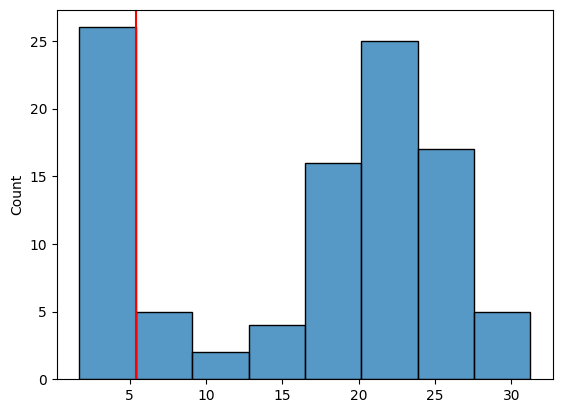

In [26]:
sns.histplot(x=Tb)
plt.axvline(x=T,color='red')

In [27]:
(Tb >= T).mean()

np.float64(0.74)